### Linear reqression with one variable 
#### finding Least Square Fit Line Equation

In [1]:
import numpy as np

# one variable 
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 5, 4, 5])

In [2]:
# mean of x and y
x_mean = np.mean(x)
y_mean = np.mean(y)

# Calculating slope m
numerator = np.sum((x - x_mean) * (y - y_mean))
denominator = np.sum((x - x_mean)**2)
m = numerator / denominator

# Calculating intercept c
c = y_mean - m * x_mean

print(f"Least Squares Fit Line: y = {m:.2f}x + {c:.2f}")

y_pred = m * x + c
print(f"Predicted values :- {y_pred}")

Least Squares Fit Line: y = 0.60x + 2.20
Predicted values :- [2.8 3.4 4.  4.6 5.2]


### Implemention 2

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("../datasets/BostonHousing.csv")
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


#### seperating dependent and independent featurs

In [5]:
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]
Y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64

#### train,test split

In [6]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=.3,random_state=42)

In [7]:
X_train.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21
116,0.13158,0.0,10.01,0,0.547,6.176,72.5,2.7301,6,432,17.8,393.30,12.04
45,0.17142,0.0,6.91,0,0.448,5.682,33.8,5.1004,3,233,17.9,396.90,10.21
16,1.05393,0.0,8.14,0,0.538,5.935,29.3,4.4986,4,307,21.0,386.85,6.58
468,15.57570,0.0,18.10,0,0.580,5.926,71.0,2.9084,24,666,20.2,368.74,18.13


In [8]:
Y_train

5      28.7
116    21.2
45     19.3
16     23.1
468    19.1
       ... 
106    19.5
270    21.1
348    24.5
435    13.4
102    18.6
Name: medv, Length: 354, dtype: float64

In [9]:
X_test

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
173,0.09178,0.0,4.05,0,0.510,6.416,84.1,2.6463,5,296,16.6,395.50,9.04
274,0.05644,40.0,6.41,1,0.447,6.758,32.9,4.0776,4,254,17.6,396.90,3.53
491,0.10574,0.0,27.74,0,0.609,5.983,98.8,1.8681,4,711,20.1,390.11,18.07
72,0.09164,0.0,10.81,0,0.413,6.065,7.8,5.2873,4,305,19.2,390.91,5.52
452,5.09017,0.0,18.10,0,0.713,6.297,91.8,2.3682,24,666,20.2,385.09,17.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...
441,9.72418,0.0,18.10,0,0.740,6.406,97.2,2.0651,24,666,20.2,385.96,19.52
23,0.98843,0.0,8.14,0,0.538,5.813,100.0,4.0952,4,307,21.0,394.54,19.88
225,0.52693,0.0,6.20,0,0.504,8.725,83.0,2.8944,8,307,17.4,382.00,4.63
433,5.58107,0.0,18.10,0,0.713,6.436,87.9,2.3158,24,666,20.2,100.19,16.22


In [10]:
Y_test

173    23.6
274    32.4
491    13.6
72     22.8
452    16.1
       ... 
441    17.1
23     14.5
225    50.0
433    14.3
447    12.6
Name: medv, Length: 152, dtype: float64

#### importing LR 

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [12]:
X_train = scaler.fit_transform(X_train)
# ensures that test data is tranformed using same learned values
X_test = scaler.transform(X_test)

In [13]:
from sklearn.linear_model import LinearRegression
# cross validation for multiple features
from sklearn.model_selection import cross_val_score

In [14]:
regression = LinearRegression()
regression.fit(X_train,Y_train)

LinearRegression()

In [15]:
mse=cross_val_score(regression,X_train,Y_train,scoring="neg_mean_squared_error",cv=10)

In [16]:
np.mean(mse)

-25.55066079166079

#### prediction

In [17]:
pred = regression.predict(X_test)

most of difference -is between -10 and 10

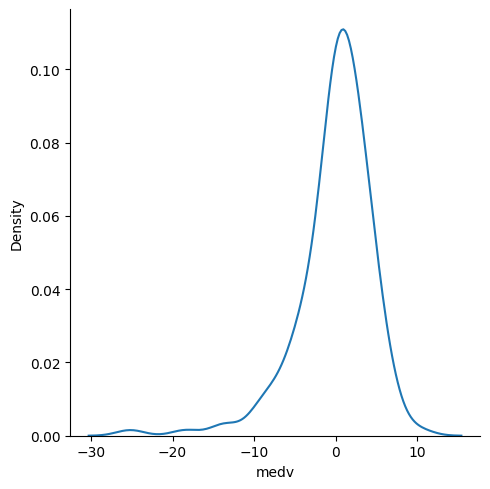

In [18]:
import seaborn as sns
sns.displot(pred-Y_test,kind="kde")

#### cost functions

##### without using libraries

In [19]:
print(np.array(pred[:5]))
print(np.array(Y_test[:5]))


[28.64896005 36.49501384 15.4111932  25.40321303 18.85527988]
[23.6 32.4 13.6 22.8 16.1]


In [20]:
# converting to np array
Y_test = np.array(Y_test)    
Y_pred = np.array(pred)   

# N 
n = len(Y_test)

# MAE: Mean Absolute Error
mae = np.mean(np.abs(Y_test - Y_pred))

# MSE: Mean Squared Error
mse = np.mean((Y_test - Y_pred) ** 2)

# RMSE: Root Mean Squared Error
rmse = np.sqrt(mse)

# R² Score
ss_total = np.sum((Y_test - np.mean(Y_test)) ** 2)
ss_res = np.sum((Y_test - Y_pred) ** 2)
r2 = 1 - (ss_res / ss_total)



# Print results
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")


MAE: 3.1627
MSE: 21.5174
RMSE: 4.6387
R² Score: 0.7112


##### evaluating metrices with libaries

In [31]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Predict on test set
Y_pred = regression.predict(X_test)

# Metrics
mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, Y_pred)

# Adjusted R²
n = X_test.shape[0]  # number of samples
p = X_test.shape[1]  # number of predictors
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Print results
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"Adjusted R² Score: {adjusted_r2:.4f}")

MAE: 3.1627
MSE: 21.5174
RMSE: 4.6387
R² Score: 0.7112
Adjusted R² Score: 0.6840


#### Ridge and Lasso Regression

- regularizing linear models to avoid overfitting and improve predictive performance.
- Both methods add a penalty term to the model’s cost function to constrain the coefficients.



In [23]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error


In [24]:
# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, Y_train)
ridge_pred = ridge.predict(X_test)
ridge_mse = mean_squared_error(Y_test, ridge_pred)

# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, Y_train)
lasso_pred = lasso.predict(X_test)
lasso_mse = mean_squared_error(Y_test, lasso_pred)

# Output
print("Ridge Coefficients:", ridge.coef_)
print("Ridge MSE:", ridge_mse)
print("Lasso Coefficients:", lasso.coef_)
print("Lasso MSE:", lasso_mse)


Ridge Coefficients: [-1.09593334  0.78820029  0.31413846  0.81943277 -1.76159118  2.91992552
 -0.30160552 -2.90234902  2.01278255 -1.376115   -2.04111302  1.02096425
 -3.87116058]
Ridge MSE: 21.548653596230213
Lasso Coefficients: [-0.80366857  0.38437697 -0.          0.82453435 -1.28754587  3.00205289
 -0.12530664 -2.14973607  0.5189894  -0.05948418 -1.89479635  0.91410162
 -3.91541844]
Lasso MSE: 22.788458807581303


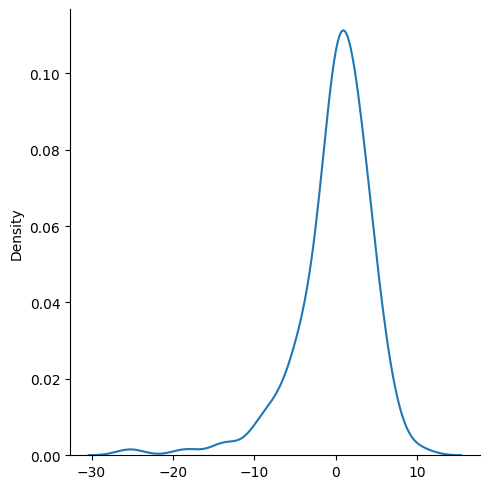

In [26]:
sns.displot(ridge_pred-Y_test,kind='kde')